In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bisect
from scipy.integrate import odeint
import statsmodels.api as sm
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
num_protein_1 = 10
num_protein_2 = 10
num_protein_3 = 10

num_mrna_1 = 10
num_mrna_2 = 10
num_mrna_3 = 10

k = 1 #repression strength (affinity between TF and promoter)
dm = 1 #degradation rate fo mRNA

dp = 5 #degradation rate of protein
gp = 5 #translation rate of protein
gm = 5 #Transcription rate of mRNA

n = 1 #Hill coefficient

In [ ]:
def linear_search(weights, rnd):
  for index, weight in enumerate(weights):
    if rnd < weight:
      return index

In [ ]:
current_time = 0
MAX_TIME = 100
protein_1 = []
protein_2 = []
protein_3 = []
mrna_1 = []
mrna_2 = []
mrna_3 = []
time = []

while current_time < MAX_TIME:

  mrna_prod_rate_1 = gm/(1 + k*(num_protein_3**n))
  mrna_prod_rate_2 = gm/(1 + k*(num_protein_1**n))
  mrna_prod_rate_3 = gm/(1 + k*(num_protein_2**n))

  mrna_deg_rate_1 = dm * num_mrna_1
  mrna_deg_rate_2 = dm * num_mrna_2
  mrna_deg_rate_3 = dm * num_mrna_3

  protein_prod_rate_1 = gp * num_mrna_1
  protein_prod_rate_2 = gp * num_mrna_2
  protein_prod_rate_3 = gp * num_mrna_3

  protein_deg_rate_1 = dp * num_protein_1
  protein_deg_rate_2 = dp * num_protein_2
  protein_deg_rate_3 = dp * num_protein_3

  cum_sum_rates = np.cumsum([mrna_prod_rate_1, mrna_prod_rate_2, mrna_prod_rate_3,
             mrna_deg_rate_1, mrna_deg_rate_2, mrna_deg_rate_3,
             protein_prod_rate_1, protein_prod_rate_2, protein_prod_rate_3,
             protein_deg_rate_1, protein_deg_rate_2, protein_deg_rate_3
             ])
  current_time += -np.log(np.random.rand()) / cum_sum_rates[-1]
  draw_prob = np.random.rand() * cum_sum_rates[-1]
  reaction_index = linear_search(cum_sum_rates, draw_prob)

  if reaction_index == 0:
    num_mrna_1 += 1
  elif reaction_index == 1:
    num_mrna_2 += 1
  elif reaction_index == 2:
    num_mrna_3 += 1
  elif reaction_index == 3:
    num_mrna_1 -= 1
  elif reaction_index == 4:
    num_mrna_2 -= 1
  elif reaction_index == 5:
    num_mrna_3 -= 1
  elif reaction_index == 6:
    num_protein_1 += 1
  elif reaction_index == 7:
    num_protein_2 += 1
  elif reaction_index == 8:
    num_protein_3 += 1
  elif reaction_index == 9:
    num_protein_1 -= 1
  elif reaction_index == 10:
    num_protein_2 -= 1
  else:
    num_protein_3 -= 1

  print("Current Time: ", current_time)

  protein_1.append(num_protein_1)
  protein_2.append(num_protein_2)
  protein_3.append(num_protein_3)
  mrna_1.append(num_mrna_1)
  mrna_2.append(num_mrna_2)
  mrna_3.append(num_mrna_3)
  time.append(current_time)

Streaming output truncated to the last 5000 lines.
Current Time:  42.94026395292034
Current Time:  42.944609115369786
Current Time:  42.94585680366426
Current Time:  42.94605002375112
Current Time:  42.99305621839486
Current Time:  43.00252325163486
Current Time:  43.00768808920198
Current Time:  43.01305458988068
Current Time:  43.01794554598868
Current Time:  43.05084910927268
Current Time:  43.066584341390566
Current Time:  43.06720622078229
Current Time:  43.07797901633944
Current Time:  43.07905124186918
Current Time:  43.08415282487734
Current Time:  43.08819456841039
Current Time:  43.12480481547558
Current Time:  43.13311277329219
Current Time:  43.150075882493155
Current Time:  43.15472919668216
Current Time:  43.16299395423765
Current Time:  43.19176280395114
Current Time:  43.20838571791784
Current Time:  43.21040642253947
Current Time:  43.23031403127595
Current Time:  43.2446543959764
Current Time:  43.248346081494475
Current Time:  43.248904645913115
Current Time:  43.254

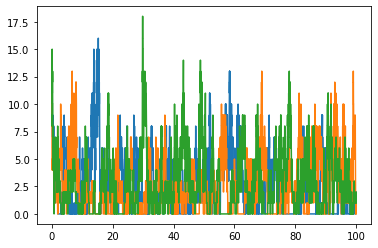

In [ ]:
plt.plot(time, protein_1)
plt.plot(time, protein_2)
plt.plot(time, protein_3)

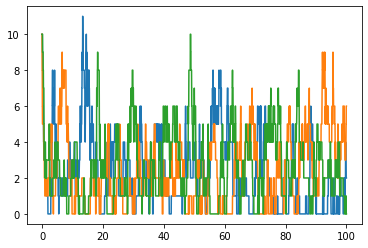

In [ ]:
plt.plot(time, mrna_1)
plt.plot(time, mrna_2)
plt.plot(time, mrna_3)

ValueError: ignored

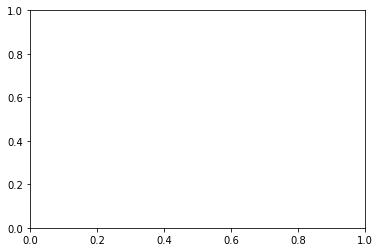

In [ ]:
sm.graphics.tsa.plot_acf(np.array(mrna_1), lags=50000)
plt.show()

In [ ]:
mrna_1

[10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,


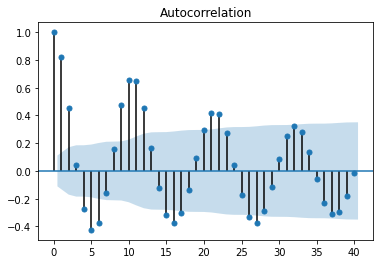

In [ ]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40)
plt.show()

In [ ]:
dta.values.squeeze()

array([  5. ,  11. ,  16. ,  23. ,  36. ,  58. ,  29. ,  20. ,  10. ,
         8. ,   3. ,   0. ,   0. ,   2. ,  11. ,  27. ,  47. ,  63. ,
        60. ,  39. ,  28. ,  26. ,  22. ,  11. ,  21. ,  40. ,  78. ,
       122. , 103. ,  73. ,  47. ,  35. ,  11. ,   5. ,  16. ,  34. ,
        70. ,  81. , 111. , 101. ,  73. ,  40. ,  20. ,  16. ,   5. ,
        11. ,  22. ,  40. ,  60. ,  80.9,  83.4,  47.7,  47.8,  30.7,
        12.2,   9.6,  10.2,  32.4,  47.6,  54. ,  62.9,  85.9,  61.2,
        45.1,  36.4,  20.9,  11.4,  37.8,  69.8, 106.1, 100.8,  81.6,
        66.5,  34.8,  30.6,   7. ,  19.8,  92.5, 154.4, 125.9,  84.8,
        68.1,  38.5,  22.8,  10.2,  24.1,  82.9, 132. , 130.9, 118.1,
        89.9,  66.6,  60. ,  46.9,  41. ,  21.3,  16. ,   6.4,   4.1,
         6.8,  14.5,  34. ,  45. ,  43.1,  47.5,  42.2,  28.1,  10.1,
         8.1,   2.5,   0. ,   1.4,   5. ,  12.2,  13.9,  35.4,  45.8,
        41.1,  30.1,  23.9,  15.6,   6.6,   4. ,   1.8,   8.5,  16.6,
        36.3,  49.6,

In [ ]:
protein_1

[10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 9,
 10,
 10,
 10,
 9,
 9,
 10,
 11,
 11,
 12,
 12,
 12,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 10,
 11,
 10,
 10,
 10,
 10,
 9,
 10,
 10,
 10,
 11,
 11,
 11,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 11,
 11,
 11,
 11,
 10,
 10,
 9,
 9,
 9,
 8,
 9,
 9,
 10,
 10,
 10,
 9,
 9,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 8,
 8,
 8,
 8,
 9,
 9,
 8,
 7,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 12,
 12,
 12,
 11,
 12,
 12,
 11,
 12,
 13,
 13,
 14,
 13,
 13,
 12,
 12,
 11,
 11,
 11,
 11,
 10,
 10,
 11,
 11,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 10,
 11,
 11,
 10,
 10,
 10,
 9,
 9,
 8,
 8,
 9,
 9,
 9,
 8,
 8,
 9,
 9,
 10,
 10,
 10,
 10,
 11,
 11,
 11,


In [ ]:
def repressilator_ode(n0, t):

    num_protein_1 = n0[0]
    num_protein_2 = n0[1]
    num_protein_3 = n0[2]
    num_mrna_1 = n0[3]
    num_mrna_2 = n0[4]
    num_mrna_3 = n0[5]

    k = 1 #repression strength (affinity between TF and promoter)
    dm = 1 #degradation rate fo mRNA

    dp = 10 #degradation rate of protein
    gp = 10 #translation rate of protein
    gm = 200 #Transcription rate of mRNA

    n = 1 #Hill coefficient

    dm1dt = (gm/(1 + k*(num_protein_3**n))) - (dm * num_mrna_1)
    dm2dt = (gm/(1 + k*(num_protein_1**n))) - (dm * num_mrna_2)
    dm3dt = (gm/(1 + k*(num_protein_2**n))) - (dm * num_mrna_3)

    dp1dt = (gp * num_mrna_1) - (dp * num_protein_1)
    dp2dt = (gp * num_mrna_2) - (dp * num_protein_2)
    dp3dt = (gp * num_mrna_3) - (dp * num_protein_3)
    
    return [dm1dt, dm2dt, dm3dt, dp1dt, dp2dt, dp3dt]

In [ ]:
n0 = [10, 10, 884, 10, 10, 10]

time = np.linspace(0, 100)
result = odeint(repressilator_ode, n0, time)
num_protein_1 = result[:, 0]
num_protein_2 = result[:, 1]
num_protein_3 = result[:, 2]
num_mrna_1 = result[:, 3]
num_mrna_2 = result[:, 4]
num_mrna_3 = result[:, 5]

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


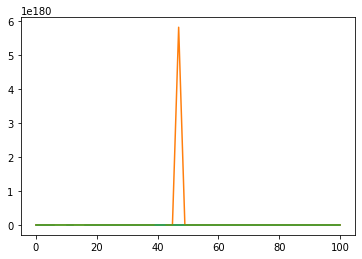

In [ ]:
plt.plot(time, num_protein_1)
plt.plot(time, num_protein_2)
plt.plot(time, num_protein_3)

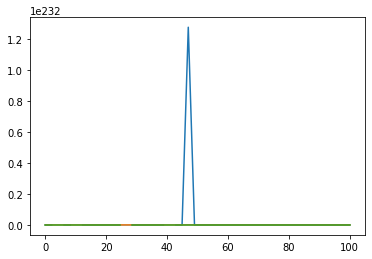

In [ ]:
plt.plot(time, num_mrna_1)
plt.plot(time, num_mrna_2)
plt.plot(time, num_mrna_3)

In [ ]:
num_protein_1 = 10
num_protein_2 = 10
num_protein_3 = 10
num_mrna_1 = 10
num_mrna_2 = 10
num_mrna_3 = 10

k = 1 #repression strength (affinity between TF and promoter)
dm = 1 #degradation rate fo mRNA

dp = 10 #degradation rate of protein
gp = 10 #translation rate of protein
gm = 20 #Transcription rate of mRNA

n = 1 #Hill coefficient





dm1dt = (gm/(1 + k*(num_protein_3**n))) - dm * num_mrna_1
dm2dt = (gm/(1 + k*(num_protein_1**n))) - dm * num_mrna_2
dm3dt = (gm/(1 + k*(num_protein_2**n))) - dm * num_mrna_3

print(dm1dt, dm2dt, dm3dt)

dp1dt = gp * num_mrna_1 - dp * num_protein_1
dp2dt = gp * num_mrna_2 - dp * num_protein_2
dp3dt = gp * num_mrna_3 - dp * num_protein_3

print(dp1dt, dp2dt, dp3dt)

-9.818181818181818 -9.818181818181818 -9.818181818181818
0 0 0


In [ ]:
np.linspace(0, 100)

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])